# google stock prediction using LSTM networks

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential # for analyzing sequential data
from keras.layers import Dense,LSTM,Dropout

In [ ]:
data = pd.read_csv('/content/Google_train_data.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [ ]:
data["Close"] = pd.to_numeric(data.Close,errors='coerce') # makes all the column elements floats
data = data.dropna() # drops null values
trainData = data.iloc[:,4:5].values # creating a new df for training data

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1)) # doing some form of normalization
trainData = scaler.fit_transform(trainData)
trainData.shape

(1149, 1)

In [ ]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0])
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [ ]:
model = Sequential()

# creating a 4-layer LSTM network with unit steps of 100 and a dropout layer to prevent overfitting
model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error") # compiled on adam optimizer and mse loss function

In [ ]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 17s - loss: 0.0400 - 17s/epoch - 476ms/step
Epoch 2/20
35/35 - 7s - loss: 0.0120 - 7s/epoch - 211ms/step
Epoch 3/20
35/35 - 9s - loss: 0.0125 - 9s/epoch - 247ms/step
Epoch 4/20
35/35 - 9s - loss: 0.0098 - 9s/epoch - 254ms/step
Epoch 5/20
35/35 - 8s - loss: 0.0077 - 8s/epoch - 241ms/step
Epoch 6/20
35/35 - 9s - loss: 0.0076 - 9s/epoch - 253ms/step
Epoch 7/20
35/35 - 9s - loss: 0.0076 - 9s/epoch - 248ms/step
Epoch 8/20
35/35 - 7s - loss: 0.0060 - 7s/epoch - 210ms/step
Epoch 9/20
35/35 - 9s - loss: 0.0061 - 9s/epoch - 243ms/step
Epoch 10/20
35/35 - 8s - loss: 0.0077 - 8s/epoch - 240ms/step
Epoch 11/20
35/35 - 7s - loss: 0.0058 - 7s/epoch - 214ms/step
Epoch 12/20
35/35 - 9s - loss: 0.0058 - 9s/epoch - 254ms/step
Epoch 13/20
35/35 - 9s - loss: 0.0056 - 9s/epoch - 244ms/step
Epoch 14/20
35/35 - 8s - loss: 0.0067 - 8s/epoch - 225ms/step
Epoch 15/20
35/35 - 9s - loss: 0.0056 - 9s/epoch - 250ms/step
Epoch 16/20
35/35 - 8s - loss: 0.0048 - 8s/epoch - 217ms/step
Epoch 17/20
35/

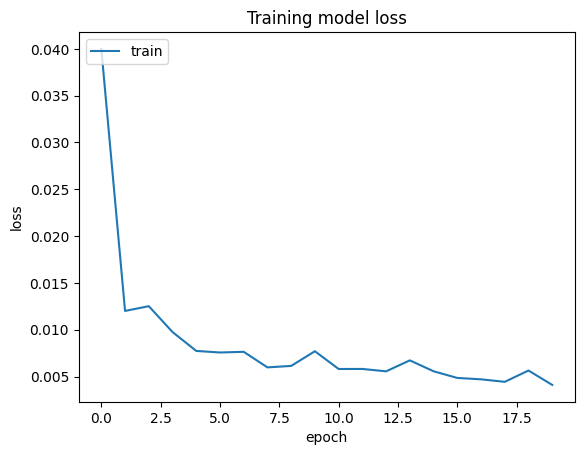

In [ ]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
# similarly...
testData = pd.read_csv('/content/Google_test_data.csv')
testData["Close"] = pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values

In [ ]:
#input array for the model
inputClosing = testData.iloc[:,0:].values
inputClosing_scaled = scaler.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)

In [ ]:
timestep = 60
for i in range(timestep,length):
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [ ]:
y_pred = model.predict(X_test)
y_pred

6/6 [==============================] - 2s 73ms/step


array([[1.1154197],
       [1.1176362],
       [1.1302243],
       [1.1484025],
       [1.1606283],
       [1.1554451],
       [1.1363465],
       [1.1150112],
       [1.1049681],
       [1.1062623],
       [1.1019299],
       [1.0913512],
       [1.0823057],
       [1.074162 ],
       [1.0746871],
       [1.0819814],
       [1.1039859],
       [1.1354442],
       [1.1682081],
       [1.1979542],
       [1.2028803],
       [1.1907132],
       [1.1623132],
       [1.128993 ],
       [1.1042036],
       [1.0955448],
       [1.0998487],
       [1.1048807],
       [1.0986464],
       [1.0868441],
       [1.0738838],
       [1.0595187],
       [1.0376828],
       [1.0115485],
       [1.0051657],
       [1.0216213],
       [1.049394 ],
       [1.0763397],
       [1.0983922],
       [1.1047703],
       [1.1128172],
       [1.1256222],
       [1.1421428],
       [1.1572946],
       [1.1661777],
       [1.1642069],
       [1.1505109],
       [1.1410507],
       [1.1412776],
       [1.1513512],


In [ ]:
predicted_price = scaler.inverse_transform(y_pred)

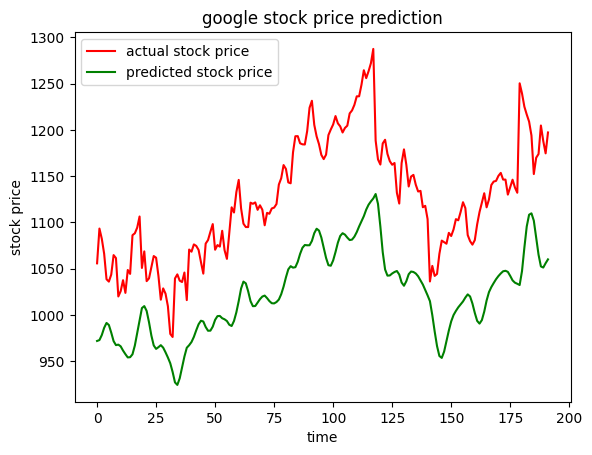

In [ ]:
plt.plot(y_test, color = 'red', label = 'actual stock price')
plt.plot(predicted_price, color = 'green', label = 'predicted stock price')
plt.title('google stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()